In [926]:
import pandas as pd
import matplotlib.pyplot as plt

In [927]:
dtypes = {'Lote': str, 'Material': str, 'Lote interno': str, 'Lote Proveedor': str, 'Qty': float, 'Fecha recepción': object, 'Fecha traslado': object}

In [928]:
mc = pd.read_excel('../../data/raw/Movimientos componentes.xlsx', dtype=dtypes)
mc.head()

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
0,23019,100001,0000737133,AM1798471,72.0,2023-01-12 00:00:00,2023-03-22 00:00:00
1,23019,100002,0000676155,K53821835,72.0,2022-03-07 00:00:00,2023-03-15 00:00:00
2,23019,100003,0000636590,0005065337,4800.0,2021-08-27 00:00:00,2023-03-13 00:00:00
3,23019,100004,0000655968,2414150,320.0,2021-11-25 00:00:00,2023-03-10 00:00:00
4,23019,100005,0000723171,M3889,96.0,2022-11-04 00:00:00,2023-03-03 00:00:00


In [929]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lote             5024 non-null   object 
 1   Material         5024 non-null   object 
 2   Lote interno     5024 non-null   object 
 3   Lote Proveedor   5024 non-null   object 
 4   Qty              5024 non-null   float64
 5   Fecha recepción  5024 non-null   object 
 6   Fecha traslado   5024 non-null   object 
dtypes: float64(1), object(6)
memory usage: 274.9+ KB


Fecha recepción y traslado are not datetimes

In [930]:
mc.describe()

,Qty
count,5024.000000
mean,1639.163955
std,2729.803662
min,-8352.000000
25%,67.200000
50%,144.940000
75%,2047.200000
max,9600.000000


It is weird for a quantity to be less than 0 (even 0 is weird!)

In [931]:
# Duplicated rows count
mc.duplicated().sum()

np.int64(104)

In [932]:
# Lets take a look at the duplicated rows how many times they are duplicated
df = mc.copy()
# For each duplicated row we are going to count the number of times the row is duplicated
df['duplicated'] = df.duplicated(keep=False)
# Get those which are duplicated
df = df[df['duplicated']]
print(df[df['duplicated']].shape[0])
# Get the row number 1
#print(df.loc[df['Lote'] == df.iloc[1]['Lote']])
# Count the number of times the row is duplicated using apply, axis = 1

df['duplicated_count'] = df.apply(lambda x: df[df.eq(x).all(1)].shape[0], axis=1)
df = df.drop_duplicates()
df = df.sort_values(by='duplicated_count', ascending=False)
# Sum
df['duplicated_count'].sum()


202


np.int64(202)

In [933]:
df.head(10)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,duplicated,duplicated_count
4874,24097,100004,0000828959,LA-APS-0303,0.0,45404,45443,True,5
3377,24034,100006,0000676218,C4837,177.6,2022-03-07 00:00:00,2024-02-01 00:00:00,True,3
3535,24038,100011,0000804674,0002408591,3200.0,2023-12-19 00:00:00,2024-02-15 00:00:00,True,3
3524,24038,100003,0000677338,0005645346,4800.0,2022-03-11 00:00:00,2024-02-14 00:00:00,True,3
1814,23093,100002,0000764791,K54491535,384.0,2023-05-25 00:00:00,2023-07-07 00:00:00,True,2
2141,23115,100012,0000780017,3178726,7872.0,2023-08-09 00:00:00,2023-10-27 00:00:00,True,2
1088,23066,100002,0000762483,K54491535,384.0,2023-05-16 00:00:00,2023-06-19 00:00:00,True,2
1091,23066,100012,0000769202,3121971,7872.0,2023-06-16 00:00:00,2023-07-05 00:00:00,True,2
2184,23116,100012,0000780017,3178726,7872.0,2023-08-09 00:00:00,2023-10-27 00:00:00,True,2
2355,23122,100012,0000780018,3178726,7872.0,2023-08-09 00:00:00,2023-11-08 00:00:00,True,2


In [934]:
df.tail(10)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,duplicated,duplicated_count
4213,24059,100001,0000804669,100977,72.0,2023-12-19 00:00:00,2024-03-04 00:00:00,True,2
4183,24058,100009,0000820609,0002439101,7680.0,2024-03-11 00:00:00,2024-03-28 00:00:00,True,2
4218,24059,100004,0000738806,2463830,320.0,2023-01-23 00:00:00,2024-03-21 00:00:00,True,2
4221,24059,100007,0000822448,4045286,8352.0,2024-03-19 00:00:00,2024-04-08 00:00:00,True,2
4855,24097,100009,0000827435,0002482368,7680.0,45397,45449,True,2
4846,24097,100011,0000814043,0002408673,3200.0,45329,45446,True,2
4858,24097,100001,0000826820,101372,57.6,45393,45433,True,2
4864,24097,100007,0000828650,4073765,8352.0,45401,45447,True,2
4867,24097,100006,0000819017,C5945,177.6,45352,45442,True,2
4881,24097,100003,0000826477,0007850532,4800.0,45392,45443,True,2


### Is there a pattern in the duplicated rows?

In [935]:
# Drop duplicated rows
mc.drop_duplicates(inplace=True)

# Columns


## Qty 

In [936]:
# Is there any non-alphanumeric character in the 'Qty' column?
print('Number of values with digit characters: ' + str(mc['Qty'].astype(str).str.count('^[-0-9.]+').sum()))
# Which ones are positive?
print('Number of positive values: ' + str(mc[mc['Qty'] > 0]['Qty'].count()))
# Which ones are negative?
print('Number of negative values: ' + str(mc[mc['Qty'] < 0]['Qty'].count()))
# Which ones are zero?
print('Number of zero values: ' + str(mc[mc['Qty'] == 0]['Qty'].count()))

Number of values with digit characters: 4920
Number of positive values: 4905
Number of negative values: 12
Number of zero values: 3


In [937]:
# Lets show the negative values
mc[mc['Qty'] < 0]

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
4845,24097,100012,0000800167,3262705,-7872.0,45254,45405
4847,24097,100011,0000814043,0002408673,-3200.0,45329,45446
4850,24097,100010,0000821622,0002452145,-96.8,45365,45449
4853,24097,100002,0000829314,K55514635,-384.8,45405,45446
4856,24097,100009,0000827435,0002482368,-7680.0,45397,45449
4859,24097,100001,0000826820,101372,-57.6,45393,45433
4862,24097,100008,0000821945,A1682579,-144.8,45366,45442
4865,24097,100007,0000828650,4073765,-8352.0,45401,45447
4868,24097,100006,0000819017,C5945,-177.6,45352,45442
4871,24097,100005,0000723171,M3889,-96.8,44869,45355


In [938]:
# Lets show the zero values
mc[mc['Qty'] == 0]

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
677,23048,100004,0000655974,2414142,0.0,2021-11-25 00:00:00,2023-03-23 00:00:00
2214,23117,100004,0000785548,KA-APS-0306,0.0,2023-09-13 00:00:00,2023-11-06 00:00:00
4874,24097,100004,0000828959,LA-APS-0303,0.0,45404,45443


In [939]:
# Lets show 10 of the positive values
mc[mc['Qty'] > 0].sample(10)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
2152,23115,100010,0000736921,0002235436,13.696,2023-01-11 00:00:00,2023-07-07 00:00:00
718,23050,100011,0000741497,0002246572,3200.000,2023-02-03 00:00:00,2023-06-19 00:00:00
3549,24038,100004,0000738450,2463825,188.000,2023-01-19 00:00:00,2024-02-08 00:00:00
649,23047,100005,0000723171,M3889,95.992,2022-11-04 00:00:00,2023-03-03 00:00:00
2764,23135,100010,0000736921,0002235436,7.680,2023-01-11 00:00:00,2023-07-07 00:00:00
2613,23130,100009,0000783722,0002327476,7720.000,2023-09-04 00:00:00,2023-11-13 00:00:00
1116,23066,100012,0000769202,3121971,2046.720,2023-06-16 00:00:00,2023-07-05 00:00:00
3838,24047,100004,0000738446,2463785,72.000,2023-01-19 00:00:00,2024-01-24 00:00:00
4405,24073,100011,0000808869,0002408636,3200.000,45307,45406
2799,23136,100008,0000778472,A1682479,10.880,2023-07-31 00:00:00,2023-11-28 00:00:00


Weird values for recepción y traslado, lets check what else happened with those columns later.

## Lote

In [940]:
### Are all lote chars digits?
mc['Lote'].str.isdigit().all()

np.True_

In [941]:
# Lote max and min length
print('Lote max length: ' + str(mc['Lote'].str.len().max()))
print('Lote min length: ' + str(mc['Lote'].str.len().min()))


Lote max length: 5
Lote min length: 5


In [942]:
#Number of unique lote values
print('Number of unique lote values: ' + str(mc['Lote'].nunique()) + ' out of ' + str(mc['Lote'].count()))

Number of unique lote values: 194 out of 4920


194 unique values != 205 unique from OF 123456 excel sheet.

## Lote proveedor

In [943]:
# Lote proveedor unique values
print('Number of unique lote proveedor values: ' + str(mc['Lote Proveedor'].nunique()) + 
      ' out of ' + str(mc['Lote Proveedor'].count()))

Number of unique lote proveedor values: 118 out of 4920


In [944]:
# Min and max length 
print('Min lote length: ' + str(mc['Lote Proveedor'].str.len().min()))
print('Max lote length: ' + str(mc['Lote Proveedor'].str.len().max()))

Min lote length: 5
Max lote length: 11


<Axes: xlabel='Lote Proveedor'>

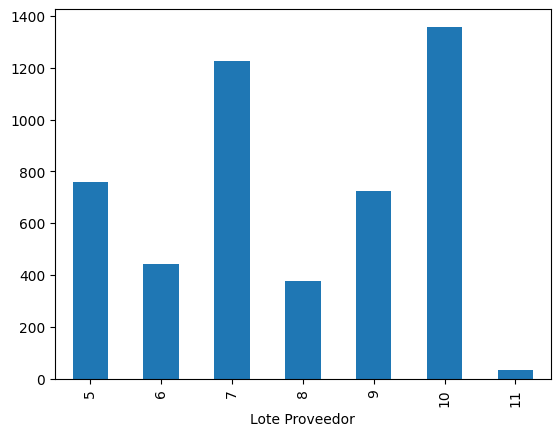

In [945]:
# Distribution of lengths
mc['Lote Proveedor'].str.len().value_counts().sort_index().plot(kind='bar')

In [946]:
# They are not all digits, but they are all alphanumeric
mc['Lote Proveedor'].str.isalnum().all()

np.False_

In [947]:
# Which is not alphanumeric?
mc[~mc['Lote Proveedor'].str.isalnum()]['Lote Proveedor'].unique()

array(['KA-APS-0306', 'KA-APS-0305', 'KA-APS-0304', 'LA-APS-0302',
       'LA-APS-0303'], dtype=object)

There are patterns and groups

In [948]:
# First values of 'Lote Proveedor' patterns
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{1})').value_counts()

0
2    47
0    35
K     9
3     8
A     5
1     4
4     3
C     3
L     2
8     1
M     1
Name: count, dtype: int64

In [949]:
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{2})').value_counts()

0 
24    44
00    35
K5     6
31     4
A1     4
40     3
KA     3
10     3
C5     2
LA     2
32     2
12     1
21     1
22     1
33     1
25     1
30     1
88     1
AM     1
C4     1
M3     1
Name: count, dtype: int64

In [950]:
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{3})').value_counts()

0  
000    35
246    13
243     9
244     9
241     8
242     5
A16     4
KA-     3
K55     3
407     2
100     2
LA-     2
101     1
311     1
300     1
250     1
220     1
129     1
215     1
327     1
326     1
317     1
315     1
312     1
888     1
404     1
331     1
C54     1
C48     1
AM1     1
C59     1
K54     1
K53     1
K52     1
M38     1
Name: count, dtype: int64

In [951]:
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{4})').value_counts()

0   
0002    27
2463    13
2430     9
2445     9
2414     8
0005     6
2428     5
KA-A     3
A168     3
1009     2
LA-A     2
2157     1
2202     1
1013     1
0007     1
0001     1
1292     1
2505     1
3159     1
3178     1
3262     1
3277     1
3319     1
3009     1
3114     1
3121     1
4073     1
4072     1
4045     1
8884     1
C483     1
C545     1
A167     1
AM17     1
K521     1
C594     1
K538     1
K544     1
K551     1
K550     1
K555     1
M388     1
Name: count, dtype: int64

Could there be any value in splitting the suppliers into several categories for statistical analysis or ML related analysis?

## Lote interno

In [952]:
# lote interno unique values
print('Number of unique lote interno values: ' + str(mc['Lote interno'].nunique()) + 
      ' out of ' + str(mc['Lote interno'].count()))

Number of unique lote interno values: 160 out of 4920


### This looks interesting, one would assume lote interno was an ID for the material transaction but seems it is not true

In [953]:
# Are all lote interno chars digits?
mc['Lote interno'].str.isdigit().all()

np.True_

In [954]:
# Minimum and max length of lote interno
print('Minimum length of lote interno: ' + str(mc['Lote interno'].str.len().min()))
print('Maximum length of lote interno: ' + str(mc['Lote interno'].str.len().max()))

Minimum length of lote interno: 10
Maximum length of lote interno: 10


In [955]:
# Is there any pattern to the unique values?
mc['Lote interno'].value_counts().index.str.extract(r'(^.{5})').value_counts()

0    
00007    90
00008    37
00006    33
Name: count, dtype: int64

In [956]:
mc['Lote interno'].value_counts().index.str.extract(r'(.{6}$)').value_counts()

0     
636590    1
637889    1
644272    1
648033    1
652422    1
         ..
828650    1
828957    1
828959    1
829314    1
837299    1
Name: count, Length: 160, dtype: int64

### This just looks like a numerical id, but we can't know what it is exactly identifying, it is likely a combination of Lote, Lote interno and Material/ proveedor which makes the row identifiable

## Fecha recepcion

In [957]:
# Number of unique values for fecha recepción
print('Number of unique fecha recepción values: ' + str(mc['Fecha recepción'].nunique()) + 
      ' out of ' + str(mc['Fecha recepción'].count()))

Number of unique fecha recepción values: 110 out of 4920


In [958]:
# Are all datetimes? 
# Check with type
import datetime
print('All recepcion datetimes: ' + str(mc['Fecha recepción'].apply(lambda x: type(x)).eq(datetime.datetime).all()))
print('All traslado datetimes: ' + str(mc['Fecha traslado'].apply(lambda x: type(x)).eq(datetime.datetime).all()))
# Get those which are not datetimes
not_dt = mc[~mc['Fecha recepción'].apply(lambda x: type(x)).eq(datetime.datetime)]
print('Number of not datetime values in fecha recepción: ' + str(not_dt.shape[0]))
not_dt = mc[~mc['Fecha traslado'].apply(lambda x: type(x)).eq(datetime.datetime)]
print('Number of not datetime values in fecha traslado: ' + str(not_dt.shape[0]))

not_dt.shape[0]
#nUnique of fecha recepción
print('nUnique of fecha recepción: ' + str(not_dt['Fecha recepción'].nunique()))
# nUnique of Lote
print('nUnique of Lote: ' + str(not_dt['Lote'].nunique()))  
# nUnique of Lote Proveedor
print('nUnique of Lote Proveedor: ' + str(not_dt['Lote Proveedor'].nunique()))
# nUnique of Material
print('nUnique of Material: ' + str(not_dt['Material'].nunique()))
# nUnique of Qty
print('nUnique of Qty: ' + str(not_dt['Qty'].nunique()))
# nUnique of Fecha traslado
print('nUnique of Fecha traslado: ' + str(not_dt['Fecha traslado'].nunique()))
# nUnique of Lote interno
print('nUnique of Lote interno: ' + str(not_dt['Lote interno'].nunique()))
print(not_dt)


All recepcion datetimes: False
All traslado datetimes: False
Number of not datetime values in fecha recepción: 760
Number of not datetime values in fecha traslado: 760
nUnique of fecha recepción: 28
nUnique of Lote: 48
nUnique of Lote Proveedor: 33
nUnique of Material: 12
nUnique of Qty: 292
nUnique of Fecha traslado: 45
nUnique of Lote interno: 40
       Lote Material Lote interno Lote Proveedor     Qty Fecha recepción  \
4254  24060   100012   0000795420        3262705  7872.0           45233   
4255  24060   100011   0000808869     0002408636  3208.0           45307   
4256  24060   100010   0000800462     0002322586    96.0           45257   
4257  24060   100002   0000820714      K55125135   384.0           45362   
4258  24060   100009   0000820609     0002439101  7688.0           45362   
...     ...      ...          ...            ...     ...             ...   
5019  24110   100001   0000826820         101372    72.0           45393   
5020  24109   100002   0000829314      K5

In [959]:
# Are non-datetime values in the fecha traslado greater than fecha recepción?
(not_dt['Fecha traslado'] > not_dt['Fecha recepción']).all()

np.True_

# Convert Excel Serial to datetime to fix the date values


In [960]:
# notdt fecha recepcion and traslado to float
# Copy not_dt to avoid SettingWithCopyWarning
not_dt = not_dt.copy()
not_dt.info()


<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 4254 to 5023
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lote             760 non-null    object 
 1   Material         760 non-null    object 
 2   Lote interno     760 non-null    object 
 3   Lote Proveedor   760 non-null    object 
 4   Qty              760 non-null    float64
 5   Fecha recepción  760 non-null    object 
 6   Fecha traslado   760 non-null    object 
dtypes: float64(1), object(6)
memory usage: 47.5+ KB


In [961]:
# Convert ints from Excel Serial Date to datetime
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal: float, _epoch0=datetime(1899, 12, 31)) -> datetime:
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)

not_dt['Fecha recepción'] = not_dt['Fecha recepción'].apply(from_excel_ordinal)
not_dt['Fecha traslado'] = not_dt['Fecha traslado'].apply(from_excel_ordinal)
not_dt

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
4254,24060,100012,0000795420,3262705,7872.0,2023-11-03,2024-04-10
4255,24060,100011,0000808869,0002408636,3208.0,2024-01-16,2024-04-18
4256,24060,100010,0000800462,0002322586,96.0,2023-11-27,2023-12-01
4257,24060,100002,0000820714,K55125135,384.0,2024-03-11,2024-04-18
4258,24060,100009,0000820609,0002439101,7688.0,2024-03-11,2024-04-16
...,...,...,...,...,...,...,...
5019,24110,100001,0000826820,101372,72.0,2024-04-11,2024-06-20
5020,24109,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10
5021,24109,100001,0000826820,101372,72.0,2024-04-11,2024-06-20
5022,24108,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10


In [962]:
# do they make sense?
(not_dt['Fecha traslado'] > not_dt['Fecha recepción']).value_counts()

True    760
Name: count, dtype: int64

In [963]:
# Are there any duplicated rows?
not_dt.duplicated().sum()

np.int64(0)

In [964]:
# DESCRIBE
not_dt['Fecha recepción'].describe()

count                              760
mean     2024-01-04 14:48:37.894736896
min                2022-11-04 00:00:00
25%                2024-02-02 00:00:00
50%                2024-03-11 00:00:00
75%                2024-04-10 00:00:00
max                2024-06-03 00:00:00
Name: Fecha recepción, dtype: object

In [965]:
not_dt['Fecha traslado'].describe()

count                              760
mean     2024-05-03 22:25:15.789473792
min                2023-12-01 00:00:00
25%                2024-04-16 00:00:00
50%                2024-05-10 00:00:00
75%                2024-06-03 00:00:00
max                2024-07-04 00:00:00
Name: Fecha traslado, dtype: object

In [966]:
mc.describe()

,Qty
count,4920.000000
mean,1601.472037
std,2700.787580
min,-8352.000000
25%,59.760000
50%,144.800000
75%,1968.000000
max,9600.000000


In [967]:
# Replace mc not_dt by index
mc.loc[not_dt.index] = not_dt
print(mc.describe())

               Qty
count  4920.000000
mean   1601.472037
std    2700.787580
min   -8352.000000
25%      59.760000
50%     144.800000
75%    1968.000000
max    9600.000000


In [968]:
mc['Fecha recepción'] = pd.to_datetime(mc['Fecha recepción'])
mc['Fecha traslado'] = pd.to_datetime(mc['Fecha traslado'])


## Duration

In [969]:
# Create a column for duration in mc
mc['Duration'] = mc['Fecha traslado'] - mc['Fecha recepción']
#mc['Duration'] = mc['Duration'].apply(dur_map)
mc


,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,Duration
0,23019,100001,0000737133,AM1798471,72.0,2023-01-12,2023-03-22,69 days
1,23019,100002,0000676155,K53821835,72.0,2022-03-07,2023-03-15,373 days
2,23019,100003,0000636590,0005065337,4800.0,2021-08-27,2023-03-13,563 days
3,23019,100004,0000655968,2414150,320.0,2021-11-25,2023-03-10,470 days
4,23019,100005,0000723171,M3889,96.0,2022-11-04,2023-03-03,119 days
...,...,...,...,...,...,...,...,...
5019,24110,100001,0000826820,101372,72.0,2024-04-11,2024-06-20,70 days
5020,24109,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10,48 days
5021,24109,100001,0000826820,101372,72.0,2024-04-11,2024-06-20,70 days
5022,24108,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10,48 days


Mean duration: 186 days 12:56:25.384615384
Median duration: 118 days 00:00:00
Std duration: 184 days 02:02:42.058699578


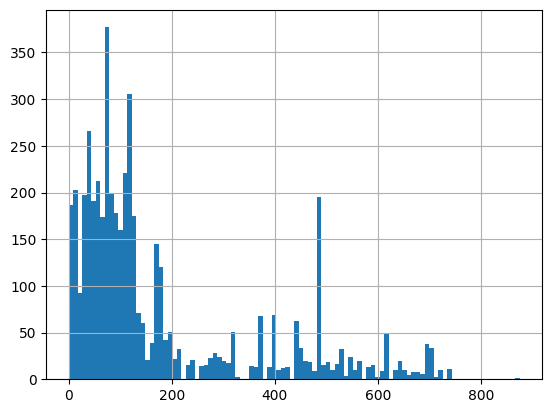

In [970]:
# Plot histogram of duration
mc['Duration'].dt.days.hist(bins=100)
# Print mean
print('Mean duration: ' + str(mc[~mc.index.isin(not_dt.index)]['Duration'].mean()))
# Print median
print('Median duration: ' + str(mc[~mc.index.isin(not_dt.index)]['Duration'].median()))
# Print std
print('Std duration: ' + str(mc[~mc.index.isin(not_dt.index)]['Duration'].std()))

## Fecha traslado


In [971]:
# Unique values of Fecha traslado
print('Unique values of Fecha traslado: ' + str(mc['Fecha traslado'].nunique()) + ' out of '
                                                 + str(mc['Fecha traslado'].count()))

Unique values of Fecha traslado: 211 out of 4920


## Material

In [972]:
print(mc['Material'].nunique())
mc['Material'].value_counts()

13


Material
100002    603
100001    590
100004    468
100007    411
100009    389
100011    381
100008    376
100006    368
100010    366
100005    365
100012    326
100003    221
100013     56
Name: count, dtype: int64

<Axes: xlabel='Material'>

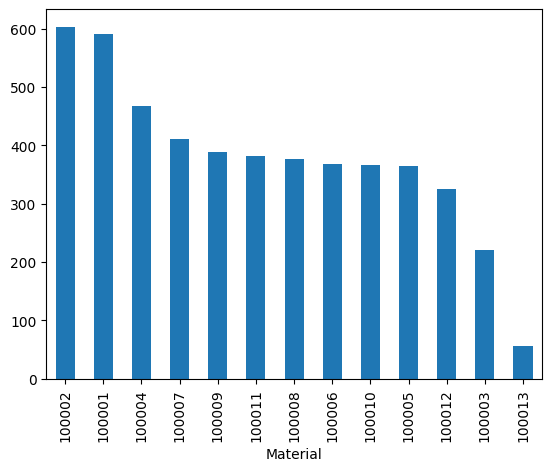

In [973]:
# Plot histogram of Material
mc['Material'].value_counts().plot(kind='bar')

### Note: 100003 and 100013 as the least frequent

In [974]:
## How many materials are there for each lote?
mc.groupby('Lote')['Material'].nunique().sort_values(ascending=False)

Lote
23115    13
23110    13
23116    13
23111    13
23024    12
         ..
23077    11
23087    11
23083    11
23074    11
23096    11
Name: Material, Length: 194, dtype: int64

In [975]:
# Does the combination of material and lote uniquely identify a row?
mc.groupby(['Lote', 'Material']).size()



Lote   Material
23019  100001      3
       100002      3
       100003      1
       100004      2
       100005      2
                  ..
24110  100008      1
       100009      1
       100010      1
       100011      1
       100012      1
Length: 2327, dtype: int64

In [976]:
# Select those which Lote and material has more than one row
# Get lote 23019 and material 100001
mc[(mc['Lote'] == '23019') & (mc['Material'] == '100001')]

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,Duration
0,23019,100001,0000737133,AM1798471,72.000,2023-01-12,2023-03-22,69 days
8,23019,100001,0000737133,AM1798471,57.600,2023-01-12,2023-03-02,49 days
19,23019,100001,0000737133,AM1798471,7.248,2023-01-12,2023-03-02,49 days


This example marks well what is happening here: We need all values to identify a row of this dataset.
We could make a new ID here to simplify it probably?

## Saving


In [977]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4920 entries, 0 to 5023
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Lote             4920 non-null   object         
 1   Material         4920 non-null   object         
 2   Lote interno     4920 non-null   object         
 3   Lote Proveedor   4920 non-null   object         
 4   Qty              4920 non-null   float64        
 5   Fecha recepción  4920 non-null   datetime64[ns] 
 6   Fecha traslado   4920 non-null   datetime64[ns] 
 7   Duration         4920 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(4), timedelta64[ns](1)
memory usage: 475.0+ KB


In [978]:
mc.to_csv('../../data/processed/mov_componentes.csv', index=False)